# Lab 2-3: Economic Dispatch of Generators in a Power System
## 43026 Energy Economics, Optimisation and Policy
### Autumn 2025
### Nonlinear Programming Approach using Python

---

## **Lab Overview**

This **Python-based Jupyter Notebook** helps you understand **economic dispatch using Nonlinear Programming (NLP)**. Our objective is to find the best way to **distribute power generation** among multiple generators at the **lowest cost** while ensuring that the **total power demand is met**.

Unlike **Linear Programming (LP)**, which assumes a constant fuel cost per MW, and **Quadratic Programming (QP)**, which accounts for diminishing returns in power generation costs, **Nonlinear Programming (NLP)** introduces an **even more realistic approach** by incorporating **cubic cost components**. This captures **nonlinear fuel consumption patterns** more accurately.

We use **Nonlinear Programming (NLP)**, a mathematical optimization method that **minimizes linear, quadratic, and cubic cost components** while satisfying constraints.

---

### **In this Lab, We Will Learn:**
- How to **represent generator costs** using **linear, quadratic, and cubic components**.
- How to **set up constraints** to ensure demand is met.
- How to **use Python’s `scipy.optimize.minimize` function** with the **Sequential Quadratic Programming (SLSQP) method** to solve the **Nonlinear Programming problem**.

---

## Step 1: Install Required Python Libraries

Before running the code, ensure you have the necessary packages installed.

```python
!pip install numpy
!pip install -U matplotlib
!pip install scipy
```

Now, import the required libraries.

```python
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
```


In [1]:
!pip install numpy
!pip install -U matplotlib
!pip install scipy

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize



---

## **Step 2: Define Generator Data**

Each generator has:
- **A fixed startup cost** (not used for this step; we focus on the running cost).
- **A nonlinear fuel cost** (includes linear, quadratic, and cubic terms).
- **Minimum and maximum power output limits**.



In [3]:
# Number of generators
num_generators = 3

# Linear fuel cost per MW ($/MW) for each generator
fuel_cost = np.array([10, 12, 9])

# Quadratic cost coefficients
quad_coef = np.array([0.03, 0.04, 0.02])

# Cubic cost coefficients
cubic_coef = np.array([0.001, 0.0015, 0.0008])

# Minimum and maximum power each generator can produce (MW)
P_min = np.array([50, 60, 40])
P_max = np.array([200, 180, 150])

# Total power demand (MW)
P_demand = 400

print("Generator data is set up for cubic + quadratic + linear cost example.")

Generator data is set up for cubic + quadratic + linear cost example.


---

## **Step 3: Define the Power Balance Constraint**

To keep the **power grid stable**, the **total power generated** must exactly match the **total demand**:

$$
\sum_{i=1}^{n} P_i = P_{\text{demand}}
$$

In [11]:
# Constraint: Total power must equal demand
constraints = ({'type': 'eq', 'fun': lambda P: np.sum(P) - P_demand})

print("Power balance constraint is defined.")

Power balance constraint is defined.


---

## **Step 4: Define the Cost Function**

The **total cost function** for each generator includes:
- A **linear term**: $ c_i P_i $
- A **quadratic term**: $ q_i P_i^2 $
- A **cubic term**: $ r_i P_i^3 $

The **objective function** we minimize is:

$$
\min \sum_{i=1}^{n} \left( c_i P_i + q_i P_i^2 + r_i P_i^3 \right)
$$

In [5]:
# Define the nonlinear cost function
def cost_function(P):
    return np.sum(fuel_cost * P + quad_coef * P**2 + cubic_coef * P**3)

print("Objective function (nonlinear cost minimization) is defined.")

Objective function (nonlinear cost minimization) is defined.


---

## **Step 5: Solve Using Nonlinear Programming**

We use **Python’s `scipy.optimize.minimize` function** with the **Sequential Quadratic Programming (SQP) method**, which is suitable for **nonlinear problems with constraints**.

### **Understanding `minimize` function**
- **Objective function** → `cost_function(P)`
- **Equality constraint** → Total power generation meets demand.
- **Bounds** → Each generator operates within its min/max limits.
- **Solver method** → `"SLSQP"` (Sequential Least Squares Quadratic Programming).

---

### **Setting Initial Conditions and Solving**

- **Initial guess (`x0`)** → Midpoint between `P_min` and `P_max`
- **Bounds (`bounds`)** → Generator limits

In [6]:
# Initial guess (somewhere in the feasible range)
P_initial = (P_min + P_max) / 2

# Bounds for each generator
bounds = list(zip(P_min, P_max))

# Solve the nonlinear optimization using SLSQP
result = minimize(cost_function, P_initial, method="SLSQP", bounds=bounds, constraints=constraints)

# Extract results
P_opt = result.x
total_cost = result.fun

print("\nOptimal power dispatch solution (3 Generators, Nonlinear):")
print(P_opt)
print(f"Total Cost: ${total_cost:.2f}")


Optimal power dispatch solution (3 Generators, Nonlinear):
[139.01091204 110.98908796 150.        ]
Total Cost: $13031.54


---

## **Step 6: Visualizing the Results**

To better understand the results, we **plot the optimal power distribution** among the generators.

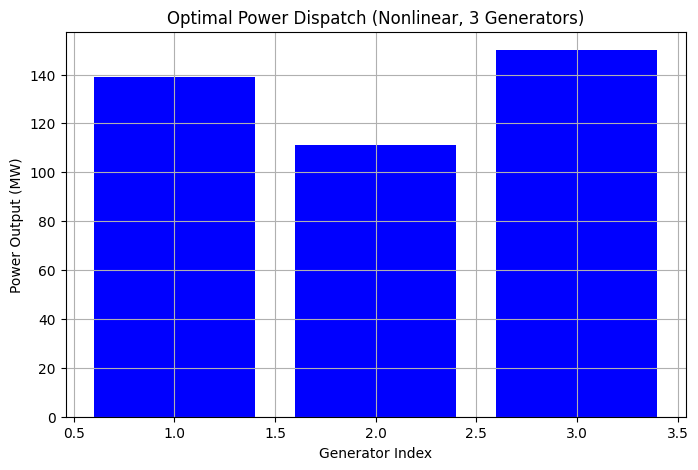

In [7]:
# Plot the power allocation for each generator
plt.figure(figsize=(8, 5))
plt.bar(range(1, num_generators + 1), P_opt, color='b')
plt.xlabel("Generator Index")
plt.ylabel("Power Output (MW)")
plt.title("Optimal Power Dispatch (Nonlinear, 3 Generators)")
plt.grid(True)
plt.show()

---

## **Step 7: More Realistic Case (7 Generators)**

Now, let's **extend the problem** to **7 generators** with similar logic.

### **Updated Conditions**
- **Increased number of generators** → `num_generators = 7`
- **Different fuel cost coefficients**
- **Increased power demand** → `P_demand = 800`


In [8]:
# Number of generators (expanded case)
num_generators = 7

# Updated generator parameters
fuel_cost = np.array([10, 12, 9, 14, 11, 13, 8])  # Linear term
quad_coef = np.array([0.03, 0.05, 0.04, 0.06, 0.03, 0.04, 0.05])  # Quadratic term
cubic_coef = np.array([0.001, 0.0012, 0.0009, 0.0015, 0.0011, 0.0013, 0.0008])  # Cubic term

# Power limits for each generator (MW)
P_min = np.array([50, 60, 40, 70, 55, 65, 45])
P_max = np.array([200, 180, 150, 220, 190, 210, 160])

# Load demand (MW)
P_demand = 800

print("Generator data is set up for the 7-generator nonlinear case.")

Generator data is set up for the 7-generator nonlinear case.


In [9]:
# Define new constraints
constraints = ({'type': 'eq', 'fun': lambda P: np.sum(P) - P_demand})

# Initial guess (midpoint of min/max limits)
P_initial = (P_min + P_max) / 2

# Bounds for each generator
bounds = list(zip(P_min, P_max))

# Solve the nonlinear optimization using SLSQP
result = minimize(cost_function, P_initial, method="SLSQP", bounds=bounds, constraints=constraints)

# Extract results
P_opt = result.x
total_cost = result.fun

print("\nOptimal Power Dispatch for 7 Generators (Nonlinear):")
print(P_opt)
print(f"Total Cost: ${total_cost:.2f}")


Optimal Power Dispatch for 7 Generators (Nonlinear):
[123.19448367 105.85254298 127.27916362  91.78280867 116.67351313
 103.34755662 131.86993131]
Total Cost: $23813.68


---

## **Step 8: Visualizing the 7-Generator Case**



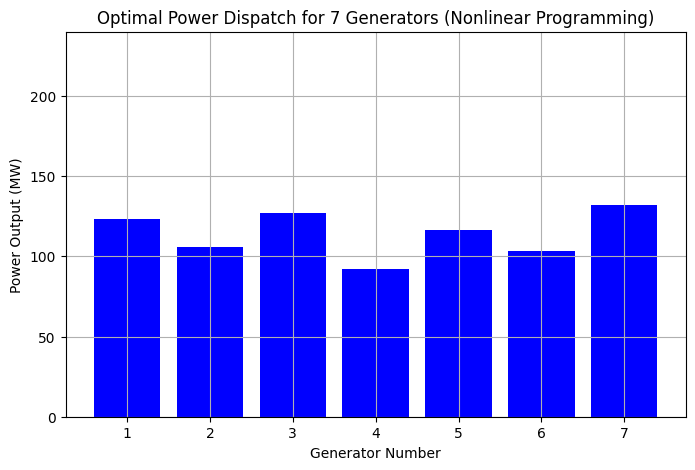

In [10]:
# Visualization: Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(range(1, num_generators + 1), P_opt, color='b')
plt.xlabel("Generator Number")
plt.ylabel("Power Output (MW)")
plt.title("Optimal Power Dispatch for 7 Generators (Nonlinear Programming)")
plt.grid(True)
plt.xticks(range(1, num_generators + 1))
plt.ylim([0, max(P_max) + 20])
plt.show()


---

## **Step 9: Summary**
- **Defined** the economic dispatch problem using **nonlinear programming**.
- **Formulated** a cost function with **linear, quadratic, and cubic components**.
- **Explained** how nonlinear fuel costs affect optimization.
- **Used `scipy.optimize.minimize` to solve the problem**.
- **Visualized** the power allocation.


---

## **APPENDIX**

# ⚡ Generator Cost Modeling with Cubic and Quadratic Terms

The values **0.0035** (for quadratic) and **0.0001** (for cubic) are **heuristic scaling factors** commonly used in power systems when exact cost curves are not available. These values help simulate a **reasonable nonlinear cost behavior** for optimization or simulation tasks in energy dispatch models.

---

## ⚙️ 1. Practical Modeling Background

In generator cost modeling, the total cost function is generally expressed as:

$$
\text{Cost}(P) = a_i P^3 + b_i P^2 + c_i P + d_i
$$

Where:

* \$c\_i\$: **Linear cost** (dominant), based on fuel cost per MW.
* \$b\_i\$: **Quadratic cost**, modeling increasing marginal cost (e.g., due to efficiency losses).
* \$a\_i\$: **Cubic cost**, introducing slight curvature for non-convex behavior or saturation effects.
* \$d\_i\$: **Fixed or startup cost** (optional in optimization models).

In empirical data from utilities:

* Quadratic coefficients \$b\_i\$ are often in the range of **1–5%** of the linear cost \$c\_i\$.
* Cubic coefficients \$a\_i\$ are typically **0.01–0.1%** of \$c\_i\$.

---

## 📐 2. Chosen Scaling Factors

To synthetically generate realistic cost curves, we define:

* **Quadratic coefficient**:

$$
b_i = 0.0035 \times \text{fuel\_cost}_i \quad \Rightarrow \text{~0.35% of } c_i
$$

This maintains a convex curve, enhancing realism while ensuring the quadratic term doesn't dominate.

* **Cubic coefficient**:

$$
a_i = 0.0001 \times \text{fuel\_cost}_i \quad \Rightarrow \text{~0.01% of } c_i
$$

This adds gentle curvature for more flexible optimization without heavily influencing the outcome.

---

## 📊 3. Illustrative Comparison

To observe the behavior of these coefficients over a realistic generator output range \$P\$, we visualize a cost curve:

```python
import numpy as np
import matplotlib.pyplot as plt

P = np.linspace(40, 200, 100)
fuel_cost = 10
quad_coef = 0.0035 * fuel_cost
cubic_coef = 0.0001 * fuel_cost

cost = cubic_coef * P**3 + quad_coef * P**2 + fuel_cost * P

plt.figure(figsize=(8, 5))
plt.plot(P, cost, label='Total Cost', linewidth=2)
plt.xlabel('Power Output (MW)')
plt.ylabel('Cost ($)')
plt.title('Generator Cost Curve Example')
plt.grid(True)
plt.legend()
plt.show()
```

---

## ✅ Summary Table

| **Coefficient**      | **Set As**             | **Typical Range**           | **Purpose**                      |
| -------------------- | ---------------------- | --------------------------- | -------------------------------- |
| Linear (\$c\_i\$)    | Fuel cost              | 10–100 \$/MW                | Main cost based on power output  |
| Quadratic (\$b\_i\$) | \$0.0035 \times c\_i\$ | \~0.1–5% of linear cost     | Models increasing marginal cost  |
| Cubic (\$a\_i\$)     | \$0.0001 \times c\_i\$ | \~0.001–0.1% of linear cost | Adds non-convexity or saturation |

---

## 📌 Notes

* These values are **synthetic defaults** suitable for test systems and academic models.
* For real-world applications, consider **regression fitting** on historical generation data to derive \$a\_i\$, \$b\_i\$, and \$c\_i\$ more precisely.




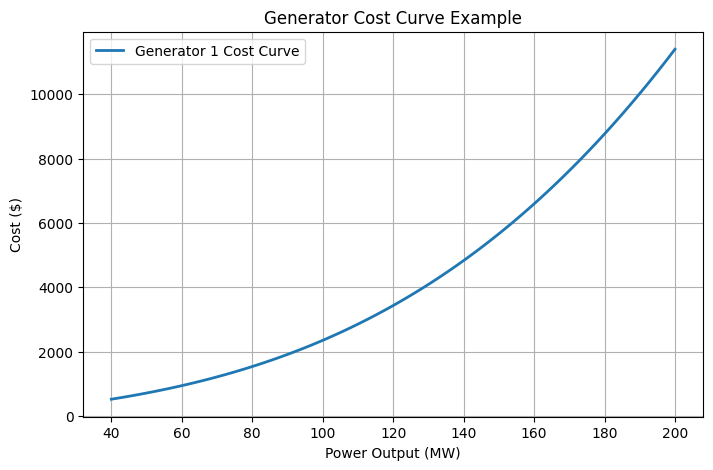

Quadratic Coefficients (bᵢ): [0.035  0.042  0.0315]
Cubic Coefficients (aᵢ): [0.001  0.0012 0.0009]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Power output range (MW)
P = np.linspace(40, 200, 100)

# Linear fuel cost per MW ($/MW) for each generator
fuel_cost = np.array([10, 12, 9])

# Generate quadratic and cubic coefficients
quad_coef = 0.0035 * fuel_cost
cubic_coef = 0.0001 * fuel_cost

# Choose one generator (e.g., index 0)
gen_idx = 0
a = cubic_coef[gen_idx]
b = quad_coef[gen_idx]
c = fuel_cost[gen_idx]

# Cost curve: a*P³ + b*P² + c*P
cost = a * P**3 + b * P**2 + c * P

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(P, cost, label=f'Generator {gen_idx + 1} Cost Curve', linewidth=2)
plt.xlabel('Power Output (MW)')
plt.ylabel('Cost ($)')
plt.title('Generator Cost Curve Example')
plt.grid(True)
plt.legend()
plt.show()

# Print all coefficients for reference
print(f"Quadratic Coefficients (bᵢ): {quad_coef}")
print(f"Cubic Coefficients (aᵢ): {cubic_coef}")